<a href="https://colab.research.google.com/github/A-varshith/NLP_LAB/blob/main/NLP_LAB3_2403a52024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2403A52024
A VARSHITH


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy

In [ ]:
academic_text ='''The rapid proliferation of generative artificial intelligence (AI) has fundamentally restructured the pedagogical landscape of higher education. While proponents argue that large language models (LLMs) facilitate personalized learning pathways and democratize access to complex data synthesis, critics contend that these technologies may inadvertently undermine cognitive development and academic integrity. Empirical studies suggest that the efficacy of AI integration is contingent upon the development of robust 'AI literacy' among both students and faculty. Consequently, institutions must move beyond binary debates of prohibition versus permission, instead focusing on the ethical calibration of algorithmic tools within existing curricula to ensure that human critical thinking remains the cornerstone of scholarly inquiry.'''

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

words = word_tokenize(academic_text)
print(f'Total words: {len(words)}')
print(f'First 20 words: {words[:20]}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Total words: 119
First 20 words: ['The', 'rapid', 'proliferation', 'of', 'generative', 'artificial', 'intelligence', '(', 'AI', ')', 'has', 'fundamentally', 'restructured', 'the', 'pedagogical', 'landscape', 'of', 'higher', 'education', '.']


In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

pos_tags = nltk.pos_tag(words)
print(f'First 20 POS tags: {pos_tags[:20]}')

unique_tags = sorted(list(set([tag for word, tag in pos_tags])))
print(f'\nUnique POS tags found: {unique_tags}')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


First 20 POS tags: [('The', 'DT'), ('rapid', 'JJ'), ('proliferation', 'NN'), ('of', 'IN'), ('generative', 'JJ'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('(', '('), ('AI', 'NNP'), (')', ')'), ('has', 'VBZ'), ('fundamentally', 'RB'), ('restructured', 'VBN'), ('the', 'DT'), ('pedagogical', 'JJ'), ('landscape', 'NN'), ('of', 'IN'), ('higher', 'JJR'), ('education', 'NN'), ('.', '.')]

Unique POS tags found: ["''", '(', ')', ',', '.', 'CC', 'DT', 'IN', 'JJ', 'JJR', 'MD', 'NN', 'NNP', 'NNS', 'POS', 'RB', 'TO', 'VB', 'VBG', 'VBN', 'VBP', 'VBZ']


In [ ]:
import spacy

# Load the English NLP model
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print('Downloading spaCy model en_core_web_sm...')
    spacy.cli.download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')

# Process the academic text
doc = nlp(academic_text)

# Extract tokens and their POS tags
spacy_pos_tags = [(token.text, token.pos_) for token in doc]

print(f'First 20 POS tags (spaCy): {spacy_pos_tags[:20]}')

# Get unique POS tags from spaCy
unique_spacy_tags = sorted(list(set([tag for text, tag in spacy_pos_tags])))
print(f'\nUnique POS tags found (spaCy): {unique_spacy_tags}')

First 20 POS tags (spaCy): [('The', 'DET'), ('rapid', 'ADJ'), ('proliferation', 'NOUN'), ('of', 'ADP'), ('generative', 'ADJ'), ('artificial', 'ADJ'), ('intelligence', 'NOUN'), ('(', 'PUNCT'), ('AI', 'PROPN'), (')', 'PUNCT'), ('has', 'AUX'), ('fundamentally', 'ADV'), ('restructured', 'VERB'), ('the', 'DET'), ('pedagogical', 'ADJ'), ('landscape', 'NOUN'), ('of', 'ADP'), ('higher', 'ADJ'), ('education', 'NOUN'), ('.', 'PUNCT')]

Unique POS tags found (spaCy): ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'PART', 'PROPN', 'PUNCT', 'SCONJ', 'VERB']


### Comparison of NLTK and spaCy POS Tag Sets

NLTK and spaCy use different tag sets, which can lead to variations in the specific tags assigned. NLTK's default tagger often uses the Penn Treebank tag set, while spaCy uses its own universal POS tags, which are more coarse-grained and consistent across languages.

**NLTK Unique POS Tags:**
```python
print(unique_tags)
```

**spaCy Unique POS Tags:**
```python
print(unique_spacy_tags)
```

**Observations:**

*   **Granularity:** NLTK's Penn Treebank tag set is generally more granular (e.g., distinguishing between `NN` for singular nouns and `NNS` for plural nouns, or different verb forms like `VB`, `VBG`, `VBN`, `VBP`, `VBZ`). SpaCy uses more universal and broader categories (e.g., a single `NOUN` tag for all nouns, and `VERB` for all verb forms).

*   **Specific Tags:**
    *   **Nouns:** NLTK has `NN` (noun, singular or mass), `NNS` (noun, plural), `NNP` (proper noun, singular). SpaCy consolidates these into `NOUN` and `PROPN` (for proper nouns).
    *   **Adjectives:** NLTK has `JJ` (adjective), `JJR` (adjective, comparative). SpaCy uses `ADJ`.
    *   **Verbs:** NLTK has a more detailed set: `VB` (verb, base form), `VBG` (verb, gerund or present participle), `VBN` (verb, past participle), `VBP` (verb, non-3rd person singular present), `VBZ` (verb, 3rd person singular present). SpaCy uses `VERB` and `AUX` (for auxiliary verbs like 'has' or 'be').
    *   **Determiners:** NLTK uses `DT`. SpaCy uses `DET`.
    *   **Prepositions/Subordinating Conjunctions:** NLTK uses `IN`. SpaCy distinguishes `ADP` (adposition) and `SCONJ` (subordinating conjunction).
    *   **Punctuation:** Both have tags for punctuation (`.`, `,`, `(`, `)` for NLTK; `PUNCT` for spaCy).
    *   **Adverbs:** Both have tags for adverbs (`RB` for NLTK, `ADV` for spaCy).

In summary, spaCy provides a more generalized, universal tag set which can be beneficial for cross-language consistency and simpler analysis, while NLTK's Penn Treebank tag set offers a more fine-grained linguistic categorization, which might be preferred for detailed syntactic analysis in English.

In [ ]:
# Extract nouns as academic concepts
academic_concepts = [token for token, pos_tag in spacy_pos_tags if pos_tag == 'NOUN']

# Extract verbs as arguments
arguments = [token for token, pos_tag in spacy_pos_tags if pos_tag == 'VERB']

print('Academic Concepts (Nouns):\n', academic_concepts)
print('\nArguments (Verbs):\n', arguments)

Academic Concepts (Nouns):
 ['proliferation', 'intelligence', 'landscape', 'education', 'proponents', 'language', 'models', 'facilitate', 'pathways', 'access', 'data', 'synthesis', 'critics', 'technologies', 'development', 'integrity', 'studies', 'efficacy', 'integration', 'development', 'AI', 'literacy', 'students', 'faculty', 'institutions', 'debates', 'prohibition', 'permission', 'calibration', 'tools', 'curricula', 'thinking', 'cornerstone', 'inquiry']

Arguments (Verbs):
 ['restructured', 'argue', 'personalized', 'learning', 'democratize', 'contend', 'undermine', 'suggest', 'move', 'focusing', 'existing', 'ensure', 'remains']


In [ ]:
import pandas as pd

# Create a DataFrame for academic concepts frequencies
academic_concepts_df = pd.DataFrame(concept_frequencies.most_common(), columns=['Concept', 'Frequency'])
print('Academic Concepts Frequency DataFrame:')
display(academic_concepts_df.head())

# Create a DataFrame for arguments frequencies
arguments_df = pd.DataFrame(argument_frequencies.most_common(), columns=['Argument', 'Frequency'])
print('\nArguments Frequency DataFrame:')
display(arguments_df.head())

Academic Concepts Frequency DataFrame:


,Concept,Frequency
0,development,2
1,proliferation,1
2,intelligence,1
3,landscape,1
4,education,1



Arguments Frequency DataFrame:


,Argument,Frequency
0,restructured,1
1,argue,1
2,personalized,1
3,learning,1
4,democratize,1


In [ ]:
from collections import Counter

# Calculate frequency of academic concepts (nouns)
concept_frequencies = Counter(academic_concepts)
print('Frequency of Academic Concepts (Nouns):')
for concept, count in concept_frequencies.most_common(10):
    print(f'- {concept}: {count}')

# Calculate frequency of arguments (verbs)
argument_frequencies = Counter(arguments)
print('\nFrequency of Arguments (Verbs):')
for argument, count in argument_frequencies.most_common(10):
    print(f'- {argument}: {count}')

Frequency of Academic Concepts (Nouns):
- development: 2
- proliferation: 1
- intelligence: 1
- landscape: 1
- education: 1
- proponents: 1
- language: 1
- models: 1
- facilitate: 1
- pathways: 1

Frequency of Arguments (Verbs):
- restructured: 1
- argue: 1
- personalized: 1
- learning: 1
- democratize: 1
- contend: 1
- undermine: 1
- suggest: 1
- move: 1
- focusing: 1


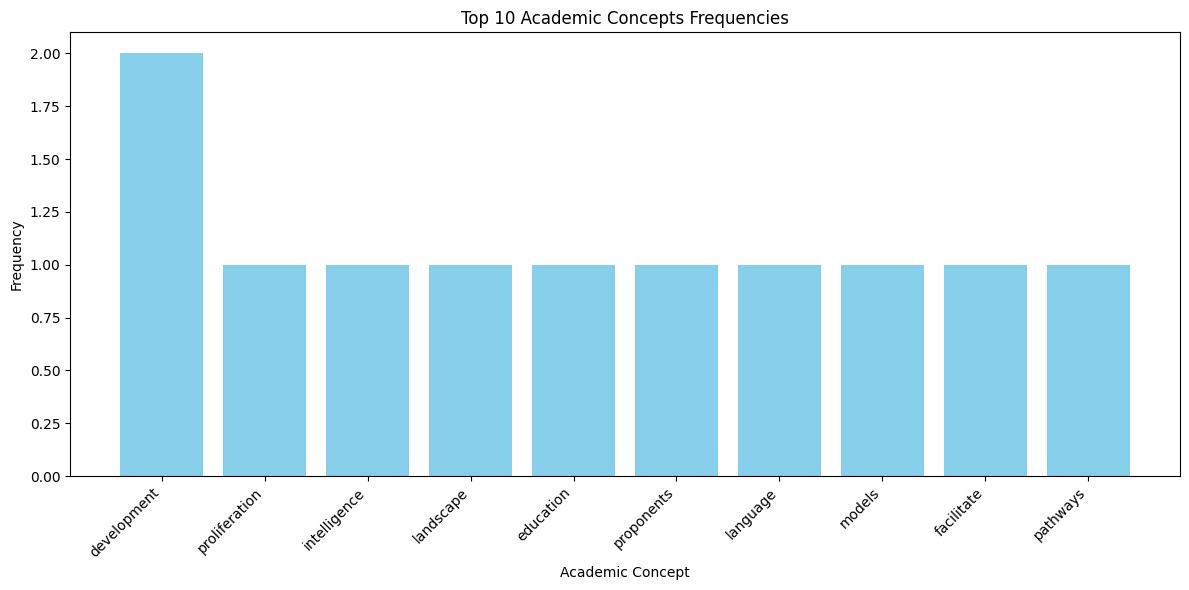

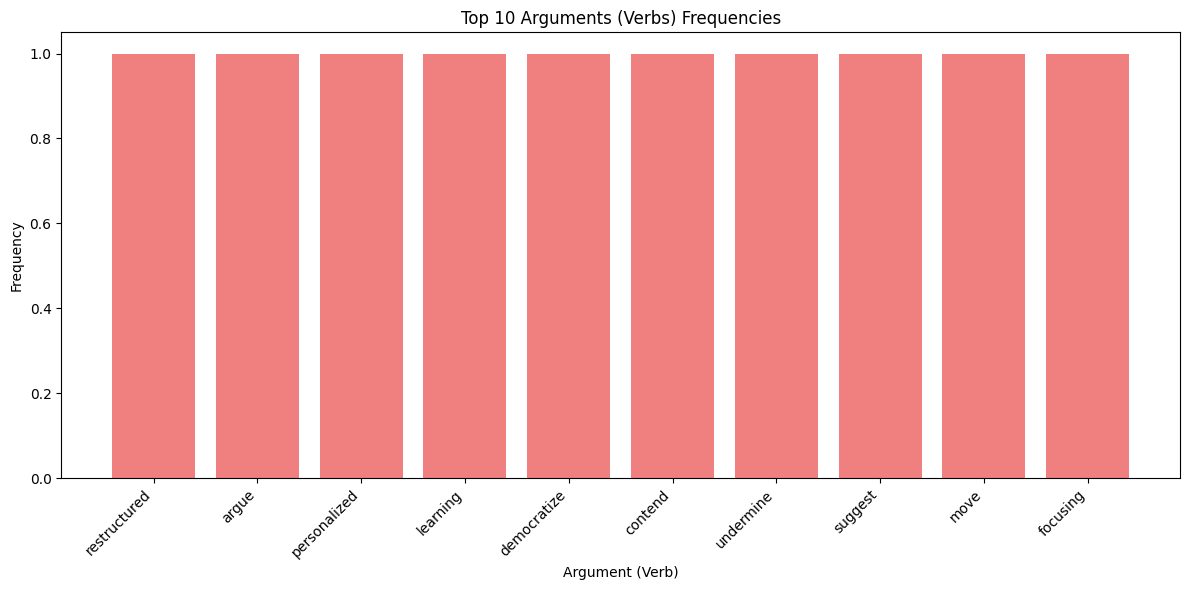

In [ ]:
import matplotlib.pyplot as plt

# Visualize top N academic concepts
n = 10
top_concepts = academic_concepts_df.head(n)
plt.figure(figsize=(12, 6))
plt.bar(top_concepts['Concept'], top_concepts['Frequency'], color='skyblue')
plt.xlabel('Academic Concept')
plt.ylabel('Frequency')
plt.title(f'Top {n} Academic Concepts Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize top N arguments
top_arguments = arguments_df.head(n)
plt.figure(figsize=(12, 6))
plt.bar(top_arguments['Argument'], top_arguments['Frequency'], color='lightcoral')
plt.xlabel('Argument (Verb)')
plt.ylabel('Frequency')
plt.title(f'Top {n} Arguments (Verbs) Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()